# Read in Cleaned Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
from google.colab import drive
from google.colab import files
drive.mount("/content/gdrive") # mount google drive, will prompt for permission

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv("gdrive/MyDrive/W200_Project_2/w200_project2_cleaned.csv") # from my drive, change path to gdrive/Shareddrives... if not located in MyDrive
df = df[df.MAIN == 'Main campus']
df.drop(columns = ['F1','MAIN','ZIP','PREDDEG','MENONLY', 'NANTI', 'RELAFFIL', 'TRIBAL', 'WOMENONLY', 'HBCU', 'HSI', 'PBI'],inplace=True)
df = df[df.ENDYEAR=='1/1/2019']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(3)

,ADM_RATE,ADM_RATE_ALL,CIP01BACHL,CIP03BACHL,CIP04BACHL,CIP05BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP12BACHL,CIP13BACHL,CIP14BACHL,CIP15BACHL,CIP16BACHL,CIP19BACHL,CIP22BACHL,CIP23BACHL,CIP24BACHL,CIP25BACHL,CIP26BACHL,CIP27BACHL,CIP29BACHL,CIP30BACHL,CIP31BACHL,CIP38BACHL,CIP39BACHL,CIP40BACHL,CIP41BACHL,CIP42BACHL,CIP43BACHL,CIP44BACHL,CIP45BACHL,CIP46BACHL,CIP47BACHL,CIP48BACHL,CIP49BACHL,CIP50BACHL,CIP51BACHL,CIP52BACHL,CIP54BACHL,CITY,CONTROL,COSTT4_A,ENDYEAR,HIGHDEG,INSTNM,MDCOST_ALL,MDCOST_PD,MDEARN_ALL,MDEARN_PD,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC1_P6,MD_EARN_WNE_INC1_P8,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC2_P6,MD_EARN_WNE_INC2_P8,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INC3_P6,MD_EARN_WNE_INC3_P8,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_INDEP0_P6,MD_EARN_WNE_INDEP0_P8,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP1_P6,MD_EARN_WNE_INDEP1_P8,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE0_P6,MD_EARN_WNE_MALE0_P8,MD_EARN_WNE_MALE1_P10,MD_EARN_WNE_MALE1_P6,MD_EARN_WNE_MALE1_P8,MD_EARN_WNE_P10,MD_EARN_WNE_P6,MD_EARN_WNE_P8,NPT41_PRIV,NPT41_PUB,NPT42_PRIV,NPT42_PUB,NPT43_PRIV,NPT43_PUB,NPT44_PRIV,NPT44_PUB,NPT45_PRIV,NPT45_PUB,NPT4_048_PRIV,NPT4_048_PUB,NPT4_3075_PRIV,NPT4_3075_PUB,NPT4_75UP_PRIV,NPT4_75UP_PUB,NPT4_PRIV,NPT4_PUB,NUMBRANCH,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,PCT25_EARN_WNE_P6,PCT25_EARN_WNE_P8,PCT25_EARN_WNE_P10,PCT75_EARN_WNE_P6,PCT75_EARN_WNE_P8,PCT75_EARN_WNE_P10,REGION,SCH_DEG,STATE,UGDS,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_MEN,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE,UGDS_WOMEN,MDCOMP_PD
0,0.5915,0.5915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Lincoln,Private nonprofit,26985.0,1/1/2019,Graduate degree,Bryan College of Health Sciences,NaN,NaN,NaN,NaN,59867.0,60125.0,55725.0,57675.0,60244.0,51824.0,61196.0,54269.0,54817.0,57831.0,56383.0,53219.0,63794.0,61916.0,58460.0,58312.0,58477.0,53784.0,89161.0,66098.0,NaN,59446.0,58880.0,55362.0,21545.0,NaN,22342.0,NaN,23905.0,NaN,26021.0,NaN,26361.0,NaN,21844.0,NaN,23124.0,NaN,26172.0,NaN,24101.0,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.0,0.0,46425.0,41372.0,40711.0,70260.0,71237.0,74953.0,"Plains (IA, KS, MN, MO, NE, ND, SD)",Bachelor's degree,NE,566.0,0.0406,0.0000,0.0353,0.0194,0.0159,0.0866,0.0000,0.0000,0.0000,0.8887,0.9134,NaN
1,0.9070,0.9070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Omaha,Private nonprofit,30388.0,1/1/2019,Graduate degree,Nebraska Methodist College of Nursing & Allied...,NaN,NaN,NaN,NaN,56012.0,52828.0,47627.0,58053.0,56890.0,52947.0,53919.0,54228.0,52282.0,56627.0,56179.0,49821.0,55486.0,53171.0,52106.0,55770.0,53995.0,48927.0,71641.0,61664.0,64858.0,56533.0,55182.0,50090.0,22703.0,NaN,20423.0,NaN,21680.0,NaN,25588.0,NaN,24805.0,NaN,21074.0,NaN,20982.0,NaN,25217.0,NaN,23779.0,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.0,0.0,38426.0,34186.0,38319.0,66755.0,66062.0,72734.0,"Plains (IA, KS, MN, MO, NE, ND, SD)",Bachelor's degree,NE,775.0,0.0258,0.0026,0.0245,0.0374,0.0568,0.1058,0.0013,0.0013,0.0232,0.8271,0.8942,NaN
2,0.6364,0.6364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,Cincinnati,Private nonprofit,25511.0,1/1/2019,Bachelor's degree,The Christ College of Nursing and Health Sciences,NaN,NaN,NaN,NaN,NaN,55417.0,56030.0,NaN,54726.0,60189.0,NaN,59384.0,57895.0,NaN,55096

# Feature Engineering

## Preprocess Categorical Variables

In [5]:
cat = ['CIP01BACHL','CIP03BACHL','CIP04BACHL','CIP05BACHL','CIP09BACHL','CIP10BACHL',
                      'CIP11BACHL','CIP12BACHL','CIP13BACHL','CIP14BACHL','CIP15BACHL','CIP16BACHL',
                      'CIP19BACHL','CIP22BACHL','CIP23BACHL','CIP24BACHL','CIP25BACHL','CIP26BACHL',
                      'CIP27BACHL','CIP29BACHL','CIP30BACHL','CIP31BACHL','CIP38BACHL','CIP39BACHL',
                      'CIP40BACHL','CIP41BACHL','CIP42BACHL','CIP43BACHL','CIP44BACHL','CIP45BACHL',
                      'CIP46BACHL','CIP47BACHL','CIP48BACHL','CIP49BACHL','CIP50BACHL','CIP51BACHL',
                      'CIP52BACHL','CIP54BACHL','REGION','CONTROL','HIGHDEG','SCH_DEG','STATE','CITY']

In [6]:
df['INSTNM'] =  df.INSTNM.astype('category')
df['ENDYEAR'] =  df.ENDYEAR.astype('category')
df['REGION'] =  df.REGION.astype('category')
df['CONTROL'] =  df.CONTROL.astype('category')
df['HIGHDEG'] =  df.HIGHDEG.astype('category')
df['SCH_DEG'] =  df.SCH_DEG.astype('category')
df['STATE'] =  df.STATE.astype('category')
df['CITY'] =  df.CITY.astype('category')

for d in cat:
    try:
        if d not in (['ENDYEAR','INSTNM']):
            df[d] = df.groupby(['INSTNM'])[d].apply(lambda x: x.fillna(x.mode().iloc[0]))
    except:
        pass


## Preprocess Continuous Variable

In [7]:
df = df[df.columns[df.isnull().sum()<df.shape[0]/2]]
for d in df[df.columns.difference(cat)].columns.tolist():
    if d not in (['ENDYEAR','INSTNM']):
        df[d] = df.groupby(['REGION'])[d].apply(lambda x: x.fillna(x.mean()))
df = df.dropna()
df.drop(columns = 'ENDYEAR',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Convert continuous values into discrete values by equivalent partitioning in pandas

In [8]:
df['ADM_RATE_BIN'] = pd.cut(df.ADM_RATE, bins=10, labels=np.arange(10), right=False)
df['ADM_RATE_ALL_BIN'] = pd.cut(df.ADM_RATE_ALL, bins=10, labels=np.arange(10), right=False)
df.drop(columns = ['ADM_RATE','ADM_RATE_ALL'],inplace=True)
cat.extend(['ADM_RATE_BIN','ADM_RATE_ALL_BIN'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

Visualize student's median income across state

In [9]:
import plotly.graph_objects as go

import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

df_map = df.groupby('STATE')['MD_EARN_WNE_P10'].mean().reset_index()
fig = go.Figure(data=go.Choropleth(
    locations=df_map['STATE'], # Spatial coordinates
    z = df['MD_EARN_WNE_P10'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "USD",
))

fig.update_layout(
    title_text = '2019 Median earnings of students working and not enrolled 10 years after entry by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

##Define Target Variable

In [10]:
# drop rows when MD_EARN_WNE_P6 is null
target_var= 'MD_EARN_WNE_P10'
df = df[~df[target_var].isnull()]

# group by INSTNM and keep the first record 
# # check for duplicates
# ids = df.loc[df.ENDYEAR=='1/1/2019',"INSTNM"]
# ids[ids.duplicated()].head()
# df.loc[(df.ENDYEAR=='1/1/2019') & (df.INSTNM=='Columbia College')]
df = df.groupby(['INSTNM']).head(1).reset_index(drop=True)

# create a list of conditions
conditions = [
    (df[target_var] >= df.MD_EARN_WNE_P6.mean()),
    (df[target_var] < df.MD_EARN_WNE_P6.mean())
    ]

# create a list of the to assign to each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using the lists as arguments
df['target'] = np.select(conditions, values)

Remove target related variables from list of features

In [11]:
target_list = df.filter(regex = 'MD').columns.tolist()
target_list = [x for i,x in enumerate(target_list) if x not in ['MDCOMP_PD']]
df.drop(columns=target_list, inplace=True)

remove_list = df.filter(regex = 'PCT').columns.tolist()
df.drop(columns=remove_list, inplace=True)

In [12]:
df.isnull().sum().head()

CIP01BACHL    0
CIP03BACHL    0
CIP04BACHL    0
CIP05BACHL    0
CIP09BACHL    0
dtype: int64

Create dummies for each categorical variable

In [13]:
# Having looked at the data, we realise that there are some cateogorical variables that are nominal. We should encode these variables.
# The modelling algorithms require data in numerical form and thus we need to convert categories to numbers by encoding.
df1 = pd.get_dummies(data = df, columns= cat)       
df1.columns = df1.columns.str.replace('.0','').str.replace(' ','_')
df1.set_index('INSTNM', inplace=True)
df1.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,COSTT4_A,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT448_PRIV,NPT4_75_PRIV,NPT4_75UP_PRIV,NPT4_PRIV,NUMBRANCH,PCI1,PCI3,PCI4,PCI5,PCI9,PCIP,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP,PCIP31,PCIP38,PCIP39,PCIP,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP,PCIP51,PCIP52,PCIP54,UGDS,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_MEN,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE,UGDS_WOMEN,target,CI1BACHL,CI1BACHL_1,CI1BACHL_2,CI3BACHL,CI3BACHL_1,CI3BACHL_2,CI4BACHL,CI4BACHL_1,CI4BACHL_2,CI5BACHL,CI5BACHL_1,CI5BACHL_2,CI9BACHL,CI9BACHL_1,CI9BACHL_2,CIPBACHL,CIPBACHL_1,CIPBACHL_2,CIP11BACHL,CIP11BACHL_1,CIP11BACHL_2,CIP12BACHL,CIP12BACHL_1,CIP12BACHL_2,CIP13BACHL,CIP13BACHL_1,CIP13BACHL_2,CIP14BACHL,CIP14BACHL_1,CIP14BACHL_2,CIP15BACHL,CIP15BACHL_1,CIP15BACHL_2,CIP16BACHL,CIP16BACHL_1,CIP16BACHL_2,CIP19BACHL,CIP19BACHL_1,CIP19BACHL_2,CIP22BACHL,CIP22BACHL_1,CIP22BACHL_2,CIP23BACHL,CIP23BACHL_1,CIP23BACHL_2,CIP24BACHL,CIP24BACHL_1,CIP24BACHL_2,CIP25BACHL,CIP25BACHL_1,CIP25BACHL_2,CIP26BACHL,CIP26BACHL_1,CIP26BACHL_2,CIP27BACHL,CIP27BACHL_1,CIP27BACHL_2,CIP29BACHL,CIP29BACHL_1,CIP29BACHL_2,CIPBACHL,CIPBACHL_1,CIPBACHL_2,CIP31BACHL,CIP31BACHL_1,CIP31BACHL_2,CIP38BACHL,CIP38BACHL_1,CIP38BACHL_2,CIP39BACHL,CIP39BACHL_1,CIP39BACHL_2,CIPBACHL,CIPBACHL_1,CIPBACHL_2,CIP41BACHL,CIP41BACHL_1,CIP41BACHL_2,CIP42BACHL,CIP42BACHL_1,CIP42BACHL_2,CIP43BACHL,CIP43BACHL_1,CIP43BACHL_2,CIP44BACHL,CIP44BACHL_1,CIP44BACHL_2,CIP45BACHL,CIP45BACHL_1,CIP45BACHL_2,CIP46BACHL,CIP46BACHL_1,CIP46BACHL_2,CIP47BACHL,CIP47BACHL_1,CIP47BACHL_2,CIP48BACHL,CIP48BACHL_1,CIP48BACHL_2,CIP49BACHL,CIP49BACHL_1,CIP49BACHL_2,CIPBACHL,CIPBACHL_1,CIPBACHL_2,CIP51BACHL,CIP51BACHL_1,CIP51BACHL_2,CIP52BACHL,CIP52BACHL_1,CIP52BACHL_2,CIP54BACHL,CIP54BACHL_1,CIP54BACHL_2,"REGION_Far_West_(AK,_CA,_HI,_NV,_OR,_WA)","REGION_Great_Lakes_(IL,_IN,_MI,_OH,_WI)","REGION_Mid_East_(DE,_DC,_MD,_NJ,_NY,_PA)","REGION_New_England_(CT,_ME,_MA,_NH,_RI,_VT)","REGION_Outlying_Areas_(AS,_FM,_GU,_MH,_MP,_PR,_PW,_VI)","REGION_Plains_(IA,_KS,_MN,_MO,_NE,_ND,_SD)","REGION_Rocky_Mountains_(CO,_ID,_MT,_UT,_WY)","REGION_Southeast_(AL,_AR,_FL,_GA,_KY,_LA,_MS,_NC,_SC,_TN,_VA,_WV)","REGION_Southwest_(AZ,_NM,_OK,_TX)",REGION_U.S._Service_Schools,CONTROL_Private_for-profit,CONTROL_Private_nonprofit,CONTROL_Public,HIGHDEG_Bachelor's_degree,HIGHDEG_Graduate_degree,HIGHDEG_Non-degree-granting,SCH_DEG_Associate_degree,SCH_DEG_Bachelor's_degree,SCH_DEG_Certificate_degree,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_GU,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VI,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,CITY_Aberdeen,CITY_Abilene,CITY_Ada,CITY_Addison,CITY_Adelphi,CITY_Adelphia,CITY_Adrian,CITY_Aguadilla,CITY_Aiken,CITY_Akron,CITY_Albany,CITY_Albion,CITY_Albuquerque,CITY_Alcorn_State,CITY_Alexandria,CITY_Alfred,CITY_Aliso_Viejo,CITY_Allendale,CITY_Allentown,CITY_Alliance,CITY_Alma,CITY_Alpine,CITY_Alva,CITY_Americus,CITY_Ames,CITY_Amherst,CITY_Anaheim,CITY_Anchorage,CITY_Anderson,CITY_Angola,CITY_Angwin,CITY_Ankeny,CITY_Ann_Arbor,CITY_Annandale-On-Hudson,CITY_Annapolis,CITY_Annville,CITY_Appleton,CITY_Arcata,CITY_Arecibo,CITY_Arkadelphia,CITY_Arlington,CITY_Asheville,CITY_Ashland,CITY_Aston,CITY_Atchison,CITY_Athens,CITY_Atherton,CITY_Atlanta,CITY_Auburn,CITY_Augusta,CITY_Aurora,CITY_Austin,CITY_Ave_Maria,CITY_Azusa,CITY_Babson_Park,CITY_Bakersfield,CITY_Baldwin_City,CITY_Baltimore,CITY_Bangor,CITY_Banner_Elk,CITY_Bar_Harbor,CITY_Barbourville,CITY_Barranquitas,CITY_Bartlesville,CITY_Batesville,CITY_Baton_Rouge,CITY_Bayamn,CITY_Bayamon,CITY_Beaumont,CITY_Beaver_Falls,CITY_

# Predictive Models

## Decision Tree¶

In this section we will implement a decision tree classifier on our data.

### Implement A Decision Tree Classifier 

In [39]:
#train-validation-test split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features=df1[df1.columns.difference(['target'])].columns
X, y  = df1[df1.columns.difference(['target'])], df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state = 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, random_state = 123)

In [38]:
# Fitting the tree and evaluation using the validation set

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_train, y_train)

print(classification_report(y_val, dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        85
           1       0.86      0.83      0.84       253

    accuracy                           0.77       338
   macro avg       0.70      0.71      0.70       338
weighted avg       0.78      0.77      0.77       338



In [16]:
# We will use the recall_Score with the pos_label 1 to understand the required metric in the train and the validation set

from sklearn.metrics import recall_score
dict_recall = {}

for max_depth in range(3,21):
    lista = []
    dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth=max_depth, random_state=42)
    dtree.fit(X_train, y_train)
    lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
    lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
    dict_recall[max_depth] = lista

df_result = pd.DataFrame(dict_recall)
df_result.index = ['Train', 'Val']
df_result

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.965744,0.951252,0.919631,0.943347,0.942029,0.968379,0.976285,0.978920,0.986825,0.997365,0.998682,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
Val,0.897233,0.877470,0.826087,0.833992,0.826087,0.861660,0.845850,0.822134,0.845850,0.841897,0.845850,0.83004,0.83004,0.83004,0.83004,0.83004,0.83004,0.83004


In [17]:
from sklearn.metrics import recall_score
dict_recall_1 = {}

for m in range(2,20, 2):
    lista = []
    dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=m, random_state=42)
    dtree.fit(X_train, y_train)
    lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
    lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
    dict_recall_1[m] = lista

df_result = pd.DataFrame(dict_recall_1)
df_result.index = ['Train', 'Val']
df_result

,2,4,6,8,10,12,14,16,18
Train,0.978920,0.969697,0.942029,0.955204,0.952569,0.955204,0.964427,0.945982,0.914361
Val,0.826087,0.845850,0.818182,0.845850,0.865613,0.869565,0.865613,0.833992,0.857708


In [18]:
from sklearn.metrics import recall_score
dict_recall_2 = {}
li = [None, 'auto', 'log2', 'sqrt']
for m in li:
    lista = []
    dtree = DecisionTreeClassifier(criterion='entropy', max_features=m, random_state = 42)
    dtree.fit(X_train, y_train)
    lista.append(recall_score(y_train, dtree.predict(X_train), pos_label = 1))
    lista.append(recall_score(y_val, dtree.predict(X_val), pos_label = 1))
    dict_recall_2[m] = lista

df_result = pd.DataFrame(dict_recall_2)
df_result.index = ['Train', 'Val']
df_result

,NaN,auto,log2,sqrt
Train,1.00000,1.00000,1.000000,1.00000
Val,0.83004,0.83004,0.837945,0.83004


In [32]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state =42)
dtc.fit(X_train, y_train)

print("******Classification Report for the test data***********")
print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_test, dtc.predict(X_test)))


******Classification Report for the test data***********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       759

    accuracy                           1.00      1013
   macro avg       1.00      1.00      1.00      1013
weighted avg       1.00      1.00      1.00      1013

              precision    recall  f1-score   support

           0       0.56      0.55      0.55       113
           1       0.85      0.86      0.85       338

    accuracy                           0.78       451
   macro avg       0.70      0.70      0.70       451
weighted avg       0.78      0.78      0.78       451



### Visualizing a tree

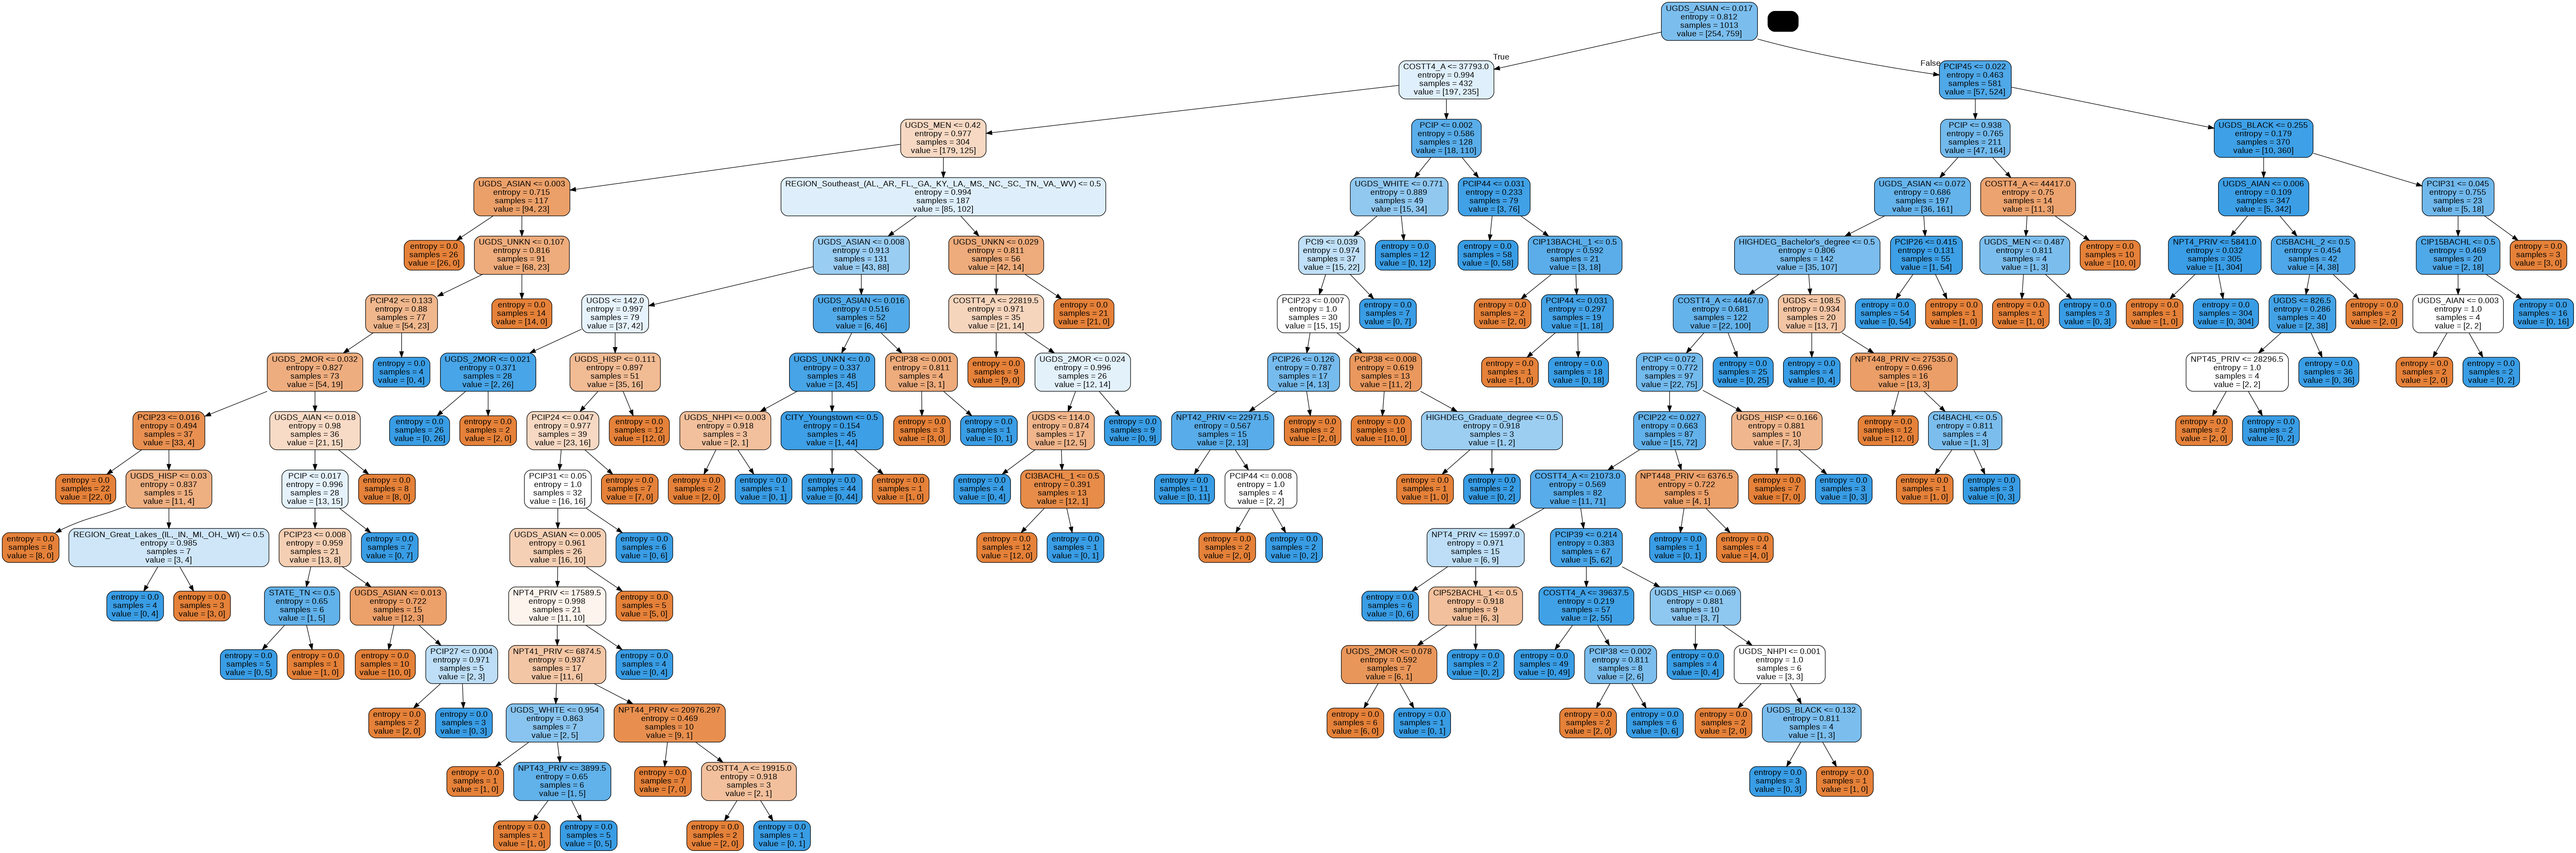

In [20]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz


dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled  = True, rounded = True, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

### Show Confusion Matrix of the Tree model

Text(0.5, 257.44, 'Predicted label')

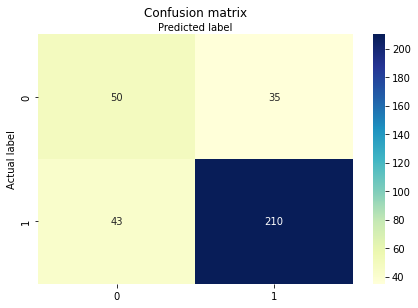

In [21]:
# create confusion matrix
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_val, dtc.predict(X_val))
cnf_matrix

# visualize confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Display Top 10 Important Featuers From Tree Model

In [22]:
## Calculating feature importance and printing top 10 important features

features = X_train.columns
feat_importance = dtc.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, dtc.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.columns  = ['Importances']
feat_imp = feat_imp.sort_values(by='Importances', ascending=False)
feat_imp.head(10)

,Importances
UGDS_ASIAN,0.217289
COSTT4_A,0.116892
UGDS,0.057566
PCIP45,0.050073
UGDS_2MOR,0.039356
UGDS_MEN,0.037358
UGDS_HISP,0.030326
UGDS_UNKN,0.029706
PCIP,0.029423
NPT4_PRIV,0.025558


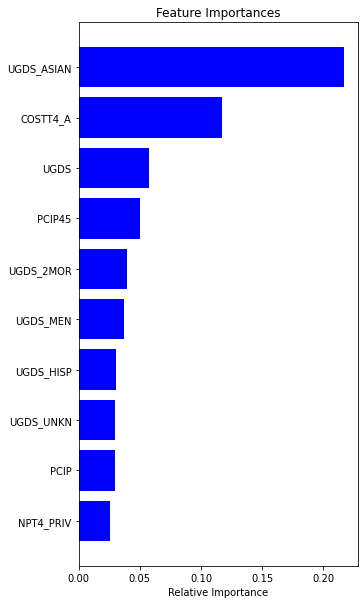

In [23]:
importances = dtc.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(5,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

## Random Forests

Let us now try out forests to see if we can get a decision structure that generalises better on unseen data.

### Implement A Random Forest Classifier 

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', n_estimators = 1000, random_state = 42)
rfc.fit(X_train, y_train)
print("*****************for 1000 estimators*****************")
print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_test, rfc.predict(X_test)))


*****************for 1000 estimators*****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       759

    accuracy                           1.00      1013
   macro avg       1.00      1.00      1.00      1013
weighted avg       1.00      1.00      1.00      1013

              precision    recall  f1-score   support

           0       0.86      0.50      0.64       113
           1       0.85      0.97      0.91       338

    accuracy                           0.86       451
   macro avg       0.86      0.74      0.77       451
weighted avg       0.86      0.86      0.84       451



### Show Confusion Matrix of the Random Forest model

Text(0.5, 257.44, 'Predicted label')

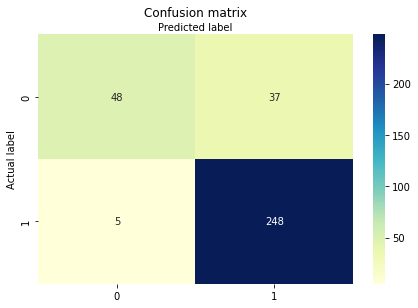

In [25]:
# create confusion matrix
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_val, rfc.predict(X_val))
cnf_matrix

# visualize confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Display Top 10 Important Featuers From Random Forest Model

In [26]:
# rfc.feature_importances_

feat_imp_dict = dict(zip(features, rfc.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.columns  = ['Importances']
feat_imp = feat_imp.sort_values(by='Importances', ascending=False)
feat_imp.head(10)

,Importances
UGDS_ASIAN,0.037448
COSTT4_A,0.031677
UGDS,0.023649
UGDS_BLACK,0.022248
NPT4_PRIV,0.022236
NPT4_75UP_PRIV,0.021626
UGDS_HISP,0.021547
UGDS_WHITE,0.020650
NPT44_PRIV,0.019424
NPT45_PRIV,0.019182


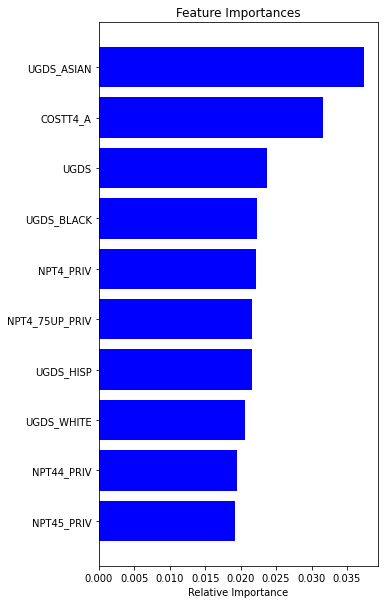

In [27]:
importances = rfc.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 10 

plt.figure(figsize=(5,10))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()